In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### Boxplots magnitudes uniformisées

Text(0.5, 0, 'Magnitude uniformisée')

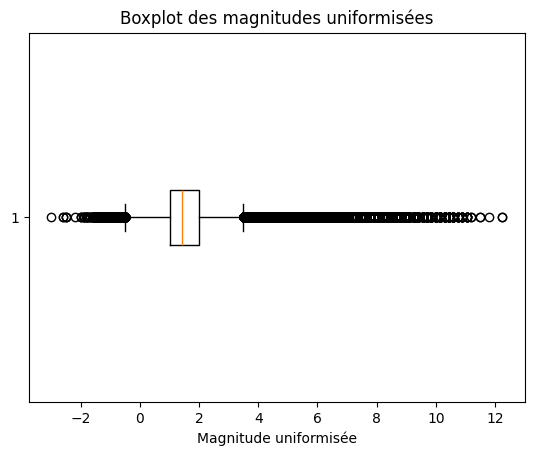

In [8]:
df_uniform = pd.read_parquet('data/STEP08_earthquakes.parquet')
df_uniform = df_uniform.dropna(subset=['mag_uniforme'])  # Supprimer les NaN

# Calculer les statistiques
stats = df_uniform['mag_uniforme'].describe()
q1 = stats['25%']
median = stats['50%']
q3 = stats['75%']
min_val = stats['min']
max_val = stats['max']
mean_val = stats['mean']

# Créer le boxplot pour mag_uniforme (horizontal)
fig2, ax2 = plt.subplots()
ax2.boxplot(df_uniform['mag_uniforme'], vert=False)
ax2.set_title('Boxplot des magnitudes uniformisées')
ax2.set_xlabel('Magnitude uniformisée')

### Type de magnitude

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'md'),
  Text(1, 0, 'ml'),
  Text(2, 0, 'mb'),
  Text(3, 0, 'mc'),
  Text(4, 0, 'mh'),
  Text(5, 0, 'Others')])

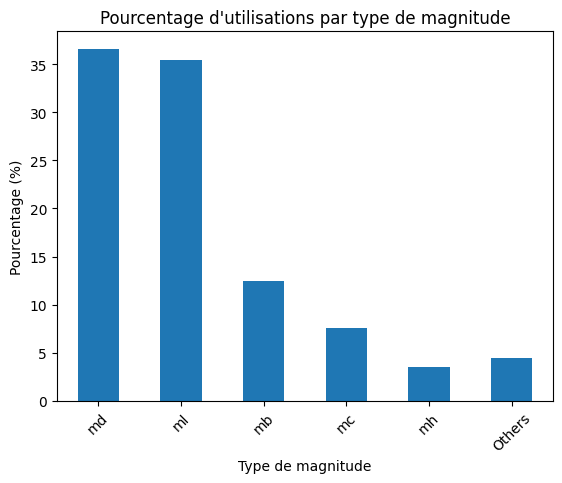

In [10]:
# Charger les données pour les statistiques
df_stats = pd.read_parquet('data/STEP08_earthquakes.parquet')
df_stats = df_stats.dropna(subset=['type_magnitude'])  # Supprimer les NaN dans magType

# Compter les occurrences de chaque type de magnitude en pourcentage
magtype_counts = df_stats['type_magnitude'].value_counts(normalize=True) * 100

# Grouper les valeurs < 3% dans "Others"
others = magtype_counts[magtype_counts < 3].sum()
magtype_counts = magtype_counts[magtype_counts >= 3]
if others > 0:
    magtype_counts['Others'] = others

# Créer un graphique en barres
fig, ax = plt.subplots()
magtype_counts.plot(kind='bar', ax=ax)
ax.set_title('Pourcentage d\'utilisations par type de magnitude')
ax.set_xlabel('Type de magnitude')
ax.set_ylabel('Pourcentage (%)')
plt.xticks(rotation=45)

### Régions les plus touchées

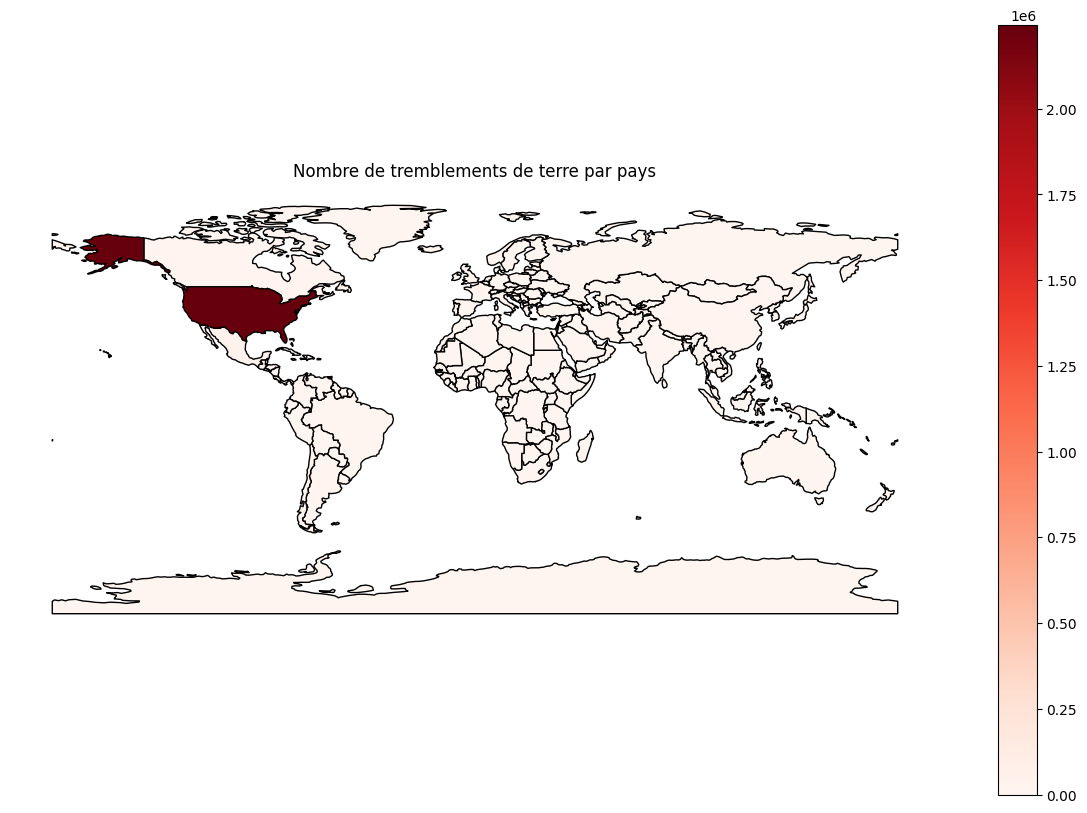

In [13]:
# Charger les données pour la carte des pays
df_map = pd.read_parquet('data/STEP08_earthquakes.parquet')
df_map = df_map.dropna(subset=['latitude', 'longitude'])

# Créer un GeoDataFrame pour les points
gdf_points = gpd.GeoDataFrame(df_map, geometry=gpd.points_from_xy(df_map.longitude, df_map.latitude), crs='EPSG:4326')

# Charger la carte du monde
url = "others/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Joindre spatialement pour obtenir le pays
joined = gpd.sjoin(gdf_points, world, how='left', predicate='within')

# Compter les tremblements par pays
country_counts = joined['NAME'].value_counts()

# Ajouter les counts à la carte du monde
world['earthquake_count'] = world['NAME'].map(country_counts).fillna(0)

# Tracer la carte choroplèthe
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='earthquake_count', ax=ax, legend=True, cmap='Reds', edgecolor='black')
ax.set_title('Nombre de tremblements de terre par pays')
ax.set_axis_off()
plt.show()

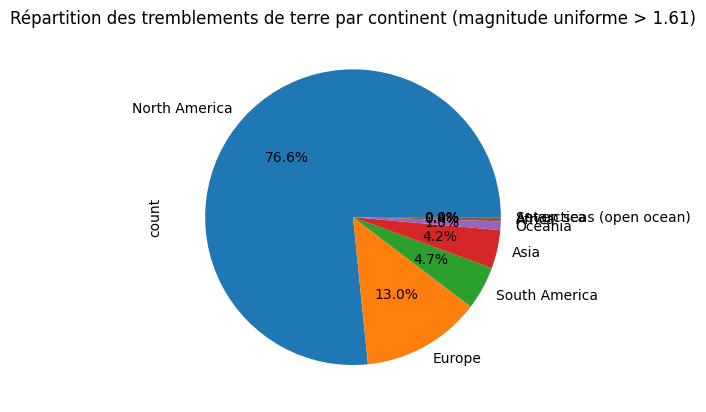

In [16]:
# Charger les données pour la carte des continents (filtré sur mag_uniforme > 1.61)
df_map = pd.read_parquet('data/STEP08_earthquakes.parquet')
df_map = df_map.dropna(subset=['latitude', 'longitude'])
df_map = df_map[df_map['mag_uniforme'] > 2]

# Créer un GeoDataFrame pour les points
gdf_points = gpd.GeoDataFrame(df_map, geometry=gpd.points_from_xy(df_map.longitude, df_map.latitude), crs='EPSG:4326')

# Charger la carte du monde
url = "others/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Joindre spatialement pour obtenir le continent
joined = gpd.sjoin(gdf_points, world, how='left', predicate='within')

continent_counts = joined['CONTINENT'].value_counts()

fig, ax = plt.subplots()
continent_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%')
ax.set_title('Répartition des tremblements de terre par continent (magnitude uniforme > 1.61)')
plt.show()